# How to use

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/simaki/fracdiff/blob/master/sample/howto/howto.ipynb)

In [1]:
# !pip install matplotlib pandas pandas_datareader seaborn
# !pip install fracdiff

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader
from pandas.plotting import register_matplotlib_converters
import seaborn

register_matplotlib_converters()
seaborn.set_style('ticks')

In [3]:
def fetch_price(ticker):
    """Return historical price"""
    return pandas_datareader.data.DataReader(
        ticker, 'yahoo', '1998-01-01', '2018-12-31'
    )[['Adj Close']]

## Fractional differentiation

A transformer class `Fracdiff` performs fractional differentiation by its method `transform`.

The following example gives 0.5th differentiation of S&P 500.

In [4]:
from fracdiff import Fracdiff

spx = fetch_price('^GSPC')  # Fetch 1d array of S&P 500 historical price

fracdiff = Fracdiff(0.5)
spx_diff = fracdiff.transform(spx.values)

In [5]:
spxd = pd.DataFrame(spx_diff, index=spx.index, columns=['SPX 0.5th fracdiff'])
spxd[fracdiff.window:]

,SPX 0.5th fracdiff
Date,
1998-01-15,163.891293
1998-01-16,177.344474
1998-01-20,189.601731
1998-01-21,172.239773
1998-01-22,165.708816
...,...
2018-12-24,324.638200
2018-12-26,486.127075
2018-12-27,464.340030


The result looks like this:

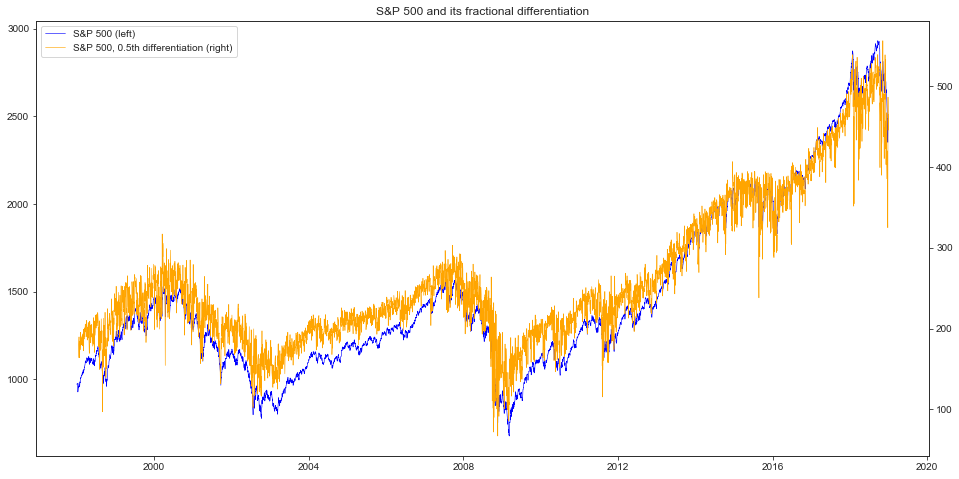

In [6]:
def plot_spx(spx, spxd):
    fig, ax_spx = plt.subplots(figsize=(16, 8))
    ax_spxd = ax_spx.twinx()

    plot_spx = ax_spx.plot(
        spx, color='blue', linewidth=0.6,
        label='S&P 500 (left)'
    )
    plot_spxd = ax_spxd.plot(
        spxd, color='orange', linewidth=0.6,
        label='S&P 500, 0.5th differentiation (right)'
    )
    plots = plot_spx + plot_spxd
    labels = [plot.get_label() for plot in plots]

    ax_spx.legend(plots, labels, loc=0)
    plt.title('S&P 500 and its fractional differentiation')
    plt.show()
    # plt.savefig('spx.png', bbox_inches="tight", pad_inches=0.1)

plot_spx(spx, spxd)

## Differentiation while preserving memory

A transformer class `StationaryFracdiff` finds the minimum order of fractional differentiation that makes time-series stationary.

In [7]:
from fracdiff import StationaryFracdiff

nky = fetch_price('^N225')  # Fetch 1d array of Nikkei 225 historical price

statfracdiff = StationaryFracdiff()
statfracdiff.fit(nky)

statfracdiff.order_

array([0.71875])

Differentiated time-series with this order is obtained by subsequently applying `transform` method.

This series is interpreted as a stationary time-series keeping the maximum memory of the original time-series.

In [8]:
nky_diff = statfracdiff.transform(nky.values)  # same with Fracdiff(0.23).transform(nky)

In [9]:
nkyd = pd.DataFrame(nky_diff, index=nky.index, columns=['Nikkei 225 fracdiff'])
nkyd[statfracdiff.window:]

,Nikkei 225 fracdiff
Date,
1998-01-20,1246.494671
1998-01-21,1420.726174
1998-01-22,866.404140
1998-01-23,1390.693930
1998-01-26,1395.197363
...,...
2018-12-21,801.166175
2018-12-25,29.238995
2018-12-26,983.538283


The method `fit_transform` carries out `fit` and `transform` at once.

In [10]:
nky_diff = statfracdiff.fit_transform(nky.values)

The result looks like this:

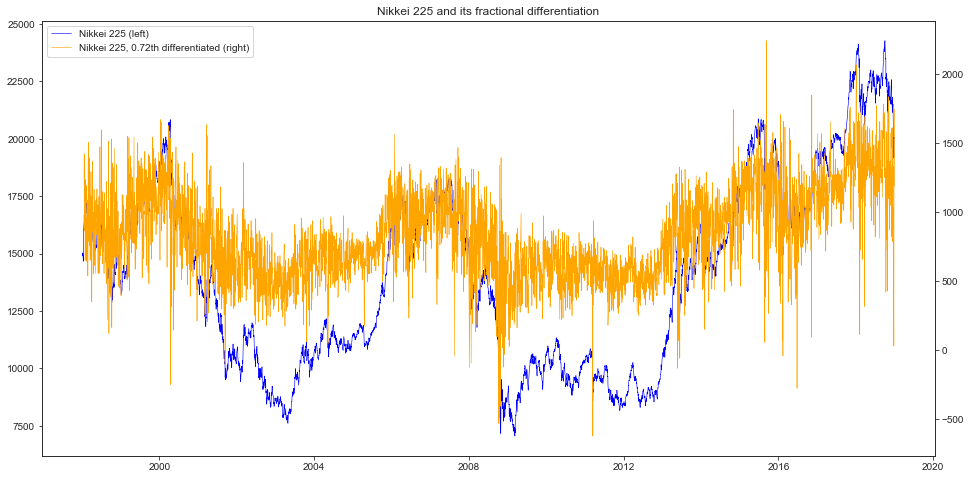

In [11]:
def plot_nky(nky, nkyd, order):
    fig, ax_nky = plt.subplots(figsize=(16, 8))
    ax_nkyd = ax_nky.twinx()

    plot_nky = ax_nky.plot(
        nky, color='blue', linewidth=0.6,
        label='Nikkei 225 (left)'
    )
    plot_nkyd = ax_nkyd.plot(
        nkyd, color='orange', linewidth=0.6,
        label=f'Nikkei 225, {order:.2f}th differentiated (right)'
    )
    plots = plot_nky + plot_nkyd
    labels = [plot.get_label() for plot in plots]

    ax_nky.legend(plots, labels, loc=0)
    plt.title('Nikkei 225 and its fractional differentiation')
    plt.show()
    # plt.savefig('nky.png', bbox_inches="tight", pad_inches=0.1)

plot_nky(nky, nkyd, statfracdiff.order_[0])